In [1]:
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import re
import random
import pandas as pd
import seaborn as sns
from collections import Counter, defaultdict
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier


from sklearn.feature_extraction import text

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

#!pip install mglearn
import mglearn


In [2]:
RANDOM_SEED = 42

## Read in prepared - clean wiki text data with engineered features here:

In [3]:
var_WikiText_Train_clean_df = pd.read_csv('training_data_export_2_features.csv')

#display(var_WikiText_Train_clean_df)

#var_WikiText_Train_X_df = var_WikiText_Train_clean_df[['text_clean','percent_dale_chall', 'percent_word_count','percent_noun_phrases']]
#var_WikiText_Train_y_df = var_WikiText_Train_clean_df['label']

## Review training data:

In [4]:
display(var_WikiText_Train_clean_df)

,text_clean,percent_dale_chall,percent_word_count,percent_noun_phrases,label
0,there is manuscript evidence that austen conti...,0.552632,0.365385,0.157895,1
1,in a remarkable comparative analysis mandaean ...,0.272727,0.211538,0.157895,1
2,before persephone was released to hermes who h...,0.619048,0.403846,0.052632,1
3,cogeneration plants are commonly found in dist...,0.312500,0.307692,0.210526,1
4,geneva lrb rrb is the second most populous cit...,0.483871,0.298077,0.368421,1
...,...,...,...,...,...
416474,a duke nukem 3d version has been sold for xbox...,0.466667,0.144231,0.052632,0
416475,however it is becoming replaced as a method of...,0.555556,0.173077,0.052632,0
416476,there are hand gestures in both hindu and budd...,0.600000,0.096154,0.105263,0
416477,if it is necessary to use colors try to choose...,0.700000,0.384615,0.105263,0


In [5]:
#display(var_WikiText_Train_y_df)

In [6]:
var_WikiText_Train_clean_df.describe()

,percent_dale_chall,percent_word_count,percent_noun_phrases,label
count,416479.000000,416479.000000,416479.000000,416479.000000
mean,0.512521,0.189367,0.119051,0.500071
std,0.189859,0.110658,0.090355,0.500001
min,0.000000,0.009615,0.000000,0.000000
25%,0.421053,0.115385,0.052632,0.000000
50%,0.533333,0.173077,0.105263,1.000000
75%,0.636364,0.250000,0.157895,1.000000
max,1.000000,1.000000,1.000000,1.000000


## Check for nulls in the data:

In [7]:
var_WikiText_Train_clean_df.isna().sum().sum()

0

In [8]:
var_WikiText_Train_clean_df['percent_dale_chall'].isna().sum()

0

In [9]:
var_WikiText_Train_clean_df['percent_word_count'].isna().sum()

0

In [10]:

# to do , need to export the y_train in data prep file here:

# important - drop the same rows in y_train as dropped in X_train here:

#var_WikiText_Train_prepare_y_train_df = var_WikiText_y_Train_clean_df[var_row_boolean_is_na['percent_dale_chall']]

#y_train = list(var_WikiText_Train_prepare_y_train_df)

#len(y_train)
#display(y_train)

In [11]:
text_data_df = var_WikiText_Train_clean_df[['text_clean','label']]

display(text_data_df)

,text_clean,label
0,there is manuscript evidence that austen conti...,1
1,in a remarkable comparative analysis mandaean ...,1
2,before persephone was released to hermes who h...,1
3,cogeneration plants are commonly found in dist...,1
4,geneva lrb rrb is the second most populous cit...,1
...,...,...
416474,a duke nukem 3d version has been sold for xbox...,0
416475,however it is becoming replaced as a method of...,0
416476,there are hand gestures in both hindu and budd...,0
416477,if it is necessary to use colors try to choose...,0


## Convert text to vector here using TF-IDF
## min = 50
## stop words = english  [note:  this version has both stopwords and without stopwords]

In [23]:


var_stop_words = text.ENGLISH_STOP_WORDS

var_vectorizor_remove_stop_words = TfidfVectorizer(min_df=50, stop_words = var_stop_words)
var_vectorizor = TfidfVectorizer(min_df=50)


text_data_tf_idf_remove_stop_words_df = var_vectorizor_remove_stop_words.fit_transform(text_data_df.text_clean)
text_data_tf_idf_df = var_vectorizor.fit_transform(text_data_df.text_clean)


## Run LSA (Truncated SVD) here:

In [24]:
stop_words_svd = TruncatedSVD(n_components=2, n_iter=20, random_state=42)
var_stop_words_svd_svd_fit = stop_words_svd.fit_transform(text_data_tf_idf_remove_stop_words_df)

svd = TruncatedSVD(n_components=2, n_iter=20, random_state=42)
var_svd_fit = svd.fit_transform(text_data_tf_idf_df)


In [25]:
display(var_stop_words_svd_svd_fit)

print(var_stop_words_svd_svd_fit.shape)

display(var_svd_fit)

print(var_svd_fit.shape)

array([[ 0.01106365, -0.00297421],
       [ 0.00459751, -0.00124558],
       [ 0.12760219, -0.03784239],
       ...,
       [ 0.00198179, -0.00051752],
       [ 0.0955282 , -0.02837437],
       [ 0.00048542, -0.00014606]])

(416479, 2)


array([[ 0.12883402, -0.08306237],
       [ 0.08716599, -0.01036085],
       [ 0.17383813, -0.13902499],
       ...,
       [ 0.09011968, -0.00401343],
       [ 0.14954521, -0.10060531],
       [ 0.00041598, -0.00024148]])

(416479, 2)


## Including stop words, plot LSA first 2 components here:

Text(0, 0.5, 'Second principal component')

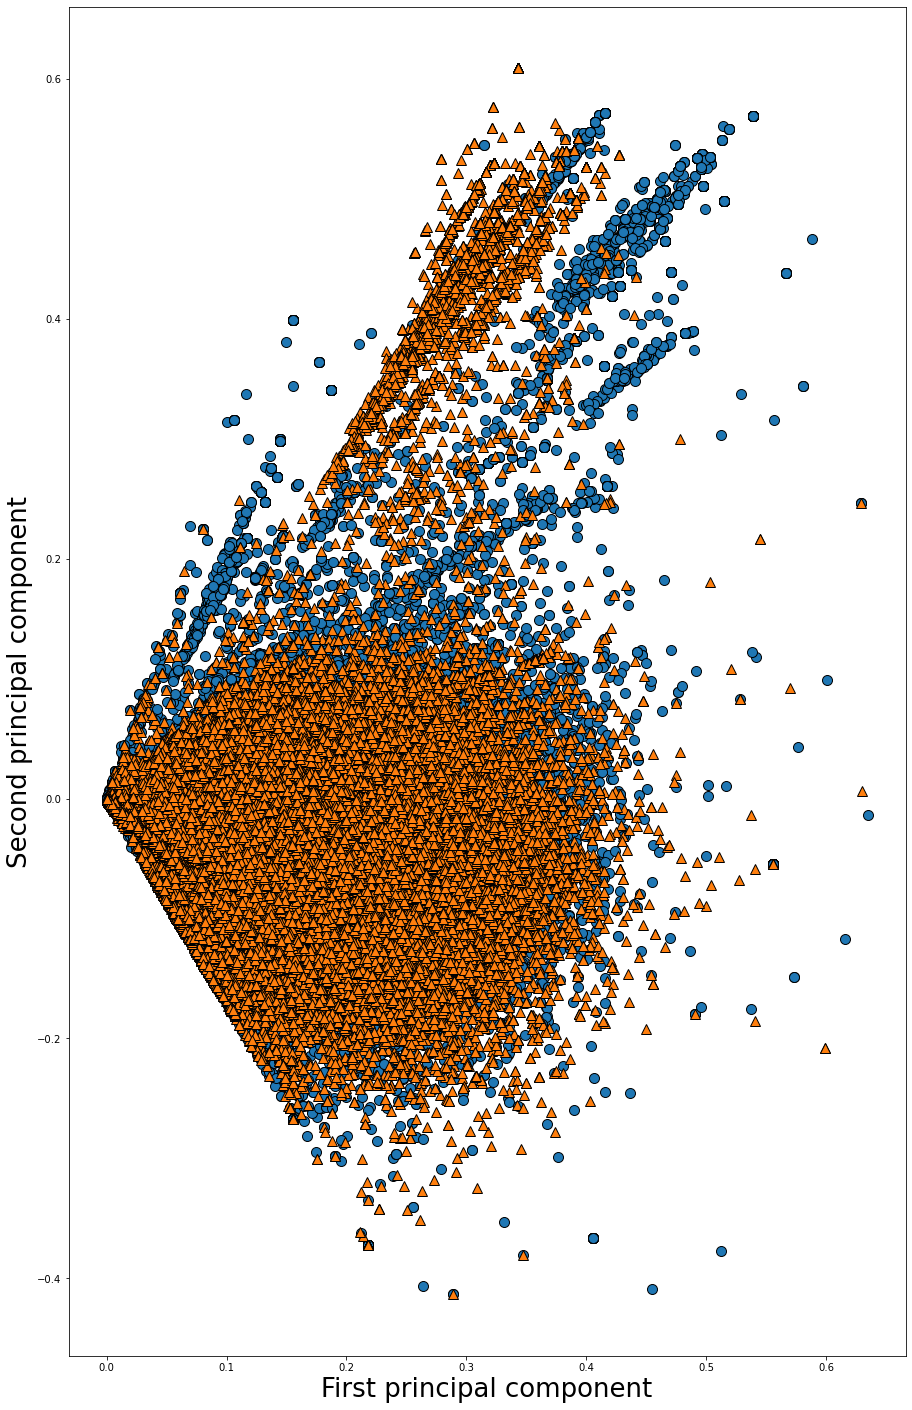

In [32]:

plt.figure(figsize=(15, 30))
mglearn.discrete_scatter(var_svd_fit[:, 0], var_svd_fit[:, 1], var_WikiText_Train_clean_df.label)

plt.gca().set_aspect("equal")
plt.xlabel("First principal component",  fontsize=26)
plt.ylabel("Second principal component", fontsize=26)

## NOT including stop words, plot LSA first 2 components here:

Text(0, 0.5, 'Second principal component')

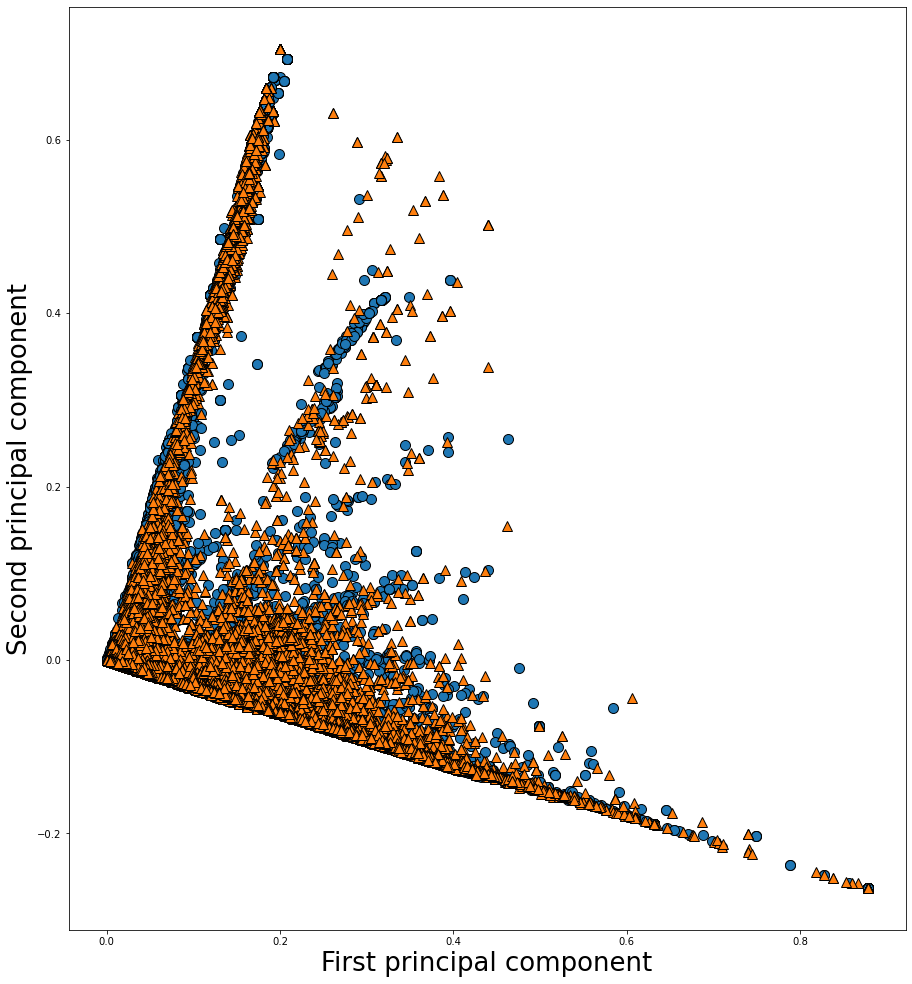

In [33]:
plt.figure(figsize=(15, 30))
mglearn.discrete_scatter(var_stop_words_svd_svd_fit[:, 0], var_stop_words_svd_svd_fit[:, 1], var_WikiText_Train_clean_df.label)

plt.gca().set_aspect("equal")
plt.xlabel("First principal component",  fontsize=26)
plt.ylabel("Second principal component",  fontsize=26)